### Warm up

Import the numpy package under the name np and the matplotlib package under the name plt.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Create a 8x4 matrix with values ranging from 0 to 31

In [2]:
values = np.arange(32)
matrix = values.reshape(8, 4)
print(matrix)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]
 [24 25 26 27]
 [28 29 30 31]]


Create a 3D NumPy array of your choice with shape (2, 3, 4) and print the element at index (1, 2, 3).

In [3]:
arr = np.arange(24).reshape(2, 3, 4)

# Print the element at index (1, 2, 3)
print("Element at index (1, 2, 3):", arr[1, 2, 3])

Element at index (1, 2, 3): 23


Perform element-wise division of arr1 and arr1:

In [4]:
arr1 = np.random.rand(2, 3, 4)
arr2 = np.arange(1, 25).reshape(2, 3, 4)

In [5]:
result = arr2 / arr1
print(result)
print(result.shape)

[[[   2.24461885    3.81277454    7.82970132    8.60487052]
  [  11.40982485   11.09826935   11.4129458    10.4941003 ]
  [  14.94760854   14.94588322   13.327037     21.0754099 ]]

 [[ 127.88408173   83.35966965  160.44805241  105.48014179]
  [  18.10378342   23.24293234   30.50555884   27.83875308]
  [  25.45171185   22.05766041 2120.11252357  228.08325899]]]
(2, 3, 4)


Generate 1000 random numbers from a Gaussian distribution with mean 0 and standard deviation 1 using NumPy. Plot the histogram of these numbers using 30 bins using Matplotlib.

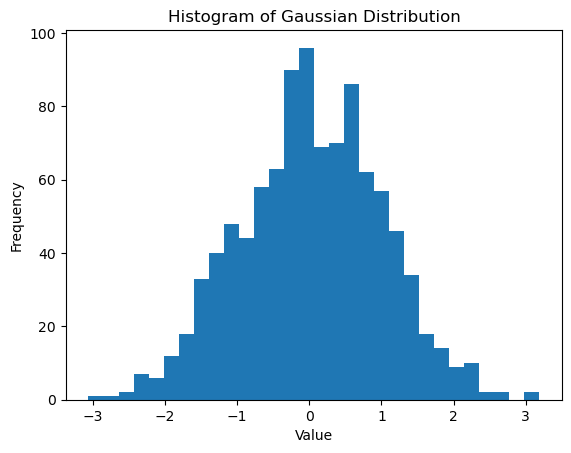

In [6]:
data = np.random.normal(0, 1, 1000)
plt.hist(data, bins=30)
plt.title('Histogram of Gaussian Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

Create four plots arranged in a 2x2 grid, each representing a different mathematical function, using plt.subplots. Plot the following functions within the range [0, 10] (use np.linspace to generate the grid):
1. $y = x^2$
2. $y = log(x)$
3. $y = e^x$
4. $y = sin(x)$

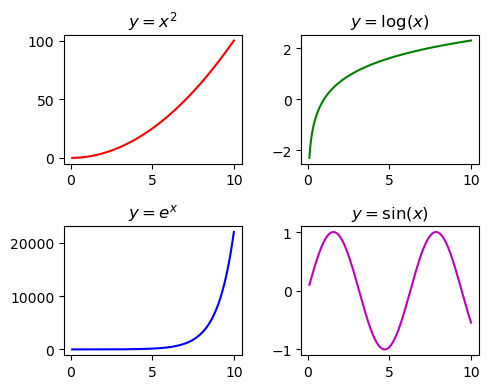

In [7]:
# Define the range
x = np.linspace(0.1, 10, 400)  # Start from 0.1 to avoid log(0) and negative values in sine function

# Define the functions
y1 = x ** 2
y2 = np.log(x)
y3 = np.exp(x)
y4 = np.sin(x)

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(5, 4))

# Plot each function
axs[0, 0].plot(x, y1, color='r')
axs[0, 0].set_title('$y = x^2$')

axs[0, 1].plot(x, y2, color='g')
axs[0, 1].set_title('$y = \log(x)$')

axs[1, 0].plot(x, y3, color='b')
axs[1, 0].set_title('$y = e^x$')

axs[1, 1].plot(x, y4, color='m')
axs[1, 1].set_title('$y = \sin(x)$')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


### Bioinformatics challenge: the WAG protein subtitution matrix

The WAG substitution matrix combines two key elements: exchangeability parameters and amino acid frequencies. These come from a dataset of 3905 globular protein amino acid sequences.

Amino acid frequencies tell us how often each amino acid appears in the sequences. Exchangeability parameters show how amino acids replace each other over time. Each row in the exchangeability parameter matrix represents the substitution rates between one amino acid and all others.

These values are crucial for understanding how proteins evolve and are used in tasks like aligning sequences and studying evolutionary relationships.

The order of amino acids in the exchangeability parameter matrix matches their order in the amino acid frequencies list: Ala, Arg, Asn, Asp, Cys, Gln, Glu, Gly, His, Ile, Leu, Lys, Met, Phe, Pro, Ser, Thr, Trp, Tyr, and Val.

the **rate matrix Q** is based on both the exchangability parameters and amino acid frequencies, and reflects the instantaneous rate of substitution between amino acids in a continuous-time Markov process.

In this exercise, we will generate the rate matrix Q based on using these exchangability parameters and frequencies.
###

The amino acid frequencies vector is given by:

In [8]:
p = np.array([0.0866279, 0.043972, 0.0390894, 0.0570451, 0.0193078, 0.0367281, 0.0580589, 0.0832518, 0.0244313, 0.048466, 0.086209, 0.0620286, 0.0195027, 0.0384319, 0.0457631, 0.0695179, 0.0610127, 0.0143859, 0.0352742, 0.0708956])


The exchangeability parameters are provided as a 20x20 lower triangular matrix in the file WAG.csv, with zeros in the diagonal. 
Import this file into a NumPy array named *M*. Utilize the np.loadtxt function and specify the encoding as 'utf-8-sig'. 

In [9]:
fname = "../data/WAG.csv"
M = np.loadtxt(fname, delimiter=',',encoding='utf-8-sig')
print(M.shape)

(20, 20)


Transform the lower diagonal matrix to a symmetrical matrix by replacing the upper triangular part, currently filled with zeros, with the symmetrical complement of the lower-dimensional matrix. 

In [11]:
S = M + M.T #- np.diag(np.diag(matrix))
print(S)

[[0.   0.55 0.51 0.74 1.03 0.91 1.58 1.42 0.32 0.19 0.4  0.91 0.89 0.21
  1.44 3.37 2.12 0.11 0.24 2.01]
 [0.55 0.   0.64 0.15 0.53 3.04 0.44 0.58 2.14 0.19 0.5  5.35 0.68 0.1
  0.68 1.22 0.55 1.16 0.38 0.25]
 [0.51 0.64 0.   5.43 0.27 1.54 0.95 1.13 3.96 0.55 0.13 3.01 0.2  0.1
  0.2  3.97 2.03 0.07 1.09 0.2 ]
 [0.74 0.15 5.43 0.   0.03 0.62 6.17 0.87 0.93 0.04 0.08 0.48 0.1  0.05
  0.42 1.07 0.37 0.13 0.33 0.15]
 [1.03 0.53 0.27 0.03 0.   0.1  0.02 0.31 0.25 0.17 0.38 0.07 0.39 0.4
  0.11 1.41 0.51 0.72 0.54 1.  ]
 [0.91 3.04 1.54 0.62 0.1  0.   5.47 0.33 4.29 0.11 0.87 3.89 1.55 0.1
  0.93 1.03 0.86 0.22 0.23 0.3 ]
 [1.58 0.44 0.95 6.17 0.02 5.47 0.   0.57 0.57 0.13 0.15 2.58 0.32 0.08
  0.68 0.7  0.82 0.16 0.2  0.59]
 [1.42 0.58 1.13 0.87 0.31 0.33 0.57 0.   0.25 0.03 0.06 0.37 0.17 0.05
  0.24 1.34 0.23 0.34 0.1  0.19]
 [0.32 2.14 3.96 0.93 0.25 4.29 0.57 0.25 0.   0.14 0.5  0.89 0.4  0.68
  0.7  0.74 0.47 0.26 3.87 0.12]
 [0.19 0.19 0.55 0.04 0.17 0.11 0.13 0.03 0.14 0.   3.17 0.

Make sure the matrix you obtained is indeed symmetrical:

In [12]:
is_symmetrical = np.array_equal(S, S.T)
print(is_symmetrical)

True


Now, you should multiply each column of this symmetric matrix in its corresponding frequency.
To achieve this:
1. Transform the vector of frequencies p_ii to a diagonal matrix *D* using `np.diag`.
2. Multiply the symmetrical matrix *S* in the diagonal matrix *D* using `np.dot` and name this matric *R*.


When you multiply a symmetric matrix 𝑆 by a diagonal matrix 𝐷 , each column of the symmetric matrix is scaled by the corresponding diagonal element of𝐷.


In [13]:
D = np.diag(p)
R = np.dot(S,D)
R.shape

(20, 20)

Next, generate a normalized matrix named *norm_R* normalize so that the average value across the entire matrix becomes 1.

In [14]:
norm_R = R / np.mean(R)
print(np.mean(norm_R))

1.0


Remember that the diagonal values of our matrix R are currently zero. 

In [15]:
np.diag(norm_R)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

Finally, ensure that the sum of each row is zero by setting the diagonal value of each row to the negative sum of the other elements in that row. Generate a new numpy array Q where the diagonal values are adjusted accordingly.

In [17]:
row_sums = norm_R.sum(axis=1)

# Create a diagonal matrix with diagonal elements equal to the negative row sums
diagonal_matrix = np.diag(-row_sums)

Q = norm_R+ diagonal_matrix

Write a function named `plot_rate_matrix` function to visualize the subtitution rates of a specific amino acid with other amino acids in a protein sequence, based on the rate matrix *Q* you obtained in the previous section. Given an index of an amino acid (say 0, which corresponds to Alanine), the function should generate a *bar plot* showing the subtitution rates from that given amino acid index to each other amino acid. Use the amino acid labels below:


In [18]:
# Amino acid labels
amino_acids = ['Ala', 'Arg', 'Asn', 'Asp', 'Cys', 'Gln', 'Glu', 'Gly', 
               'His', 'Ile', 'Leu', 'Lys', 'Met', 'Phe', 'Pro', 'Ser', 
               'Thr', 'Trp', 'Tyr', 'Val']

In [19]:


# Example exchangeability matrix (replace this with your actual 20x20 numpy array)

# Function to plot exchangeability rates for a given amino acid index
def plot_exchangeability(amino_acid_index):
    plt.figure(figsize=(6, 4))
    plt.bar(np.arange(20), Q[amino_acid_index,:], color='skyblue')
    plt.title(f'Exchangeability Rates of {amino_acids[amino_acid_index]} with Other Amino Acids')
    plt.xlabel('Amino Acid')
    plt.ylabel('Exchangeability Rate')
    plt.xticks(np.arange(20), amino_acids, rotation=45)
    plt.tight_layout()
    plt.show()


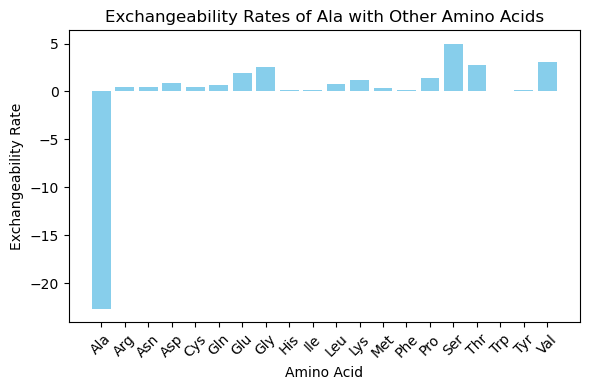

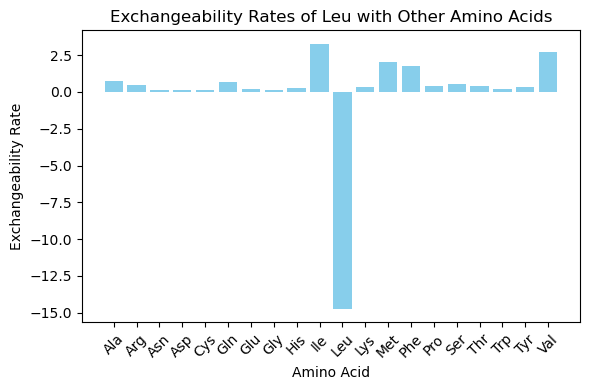

In [20]:
# Plotting exchangeability rates for a specific amino acid (e.g., Alanine - index 0)
plot_exchangeability(0)

# Plotting exchangeability rates for another amino acid (e.g., Leucine - index 10)
plot_exchangeability(10)